# RNN and LSTM with TF2.0

- 텍스트 마이닝에서 딥러닝을 사용하기 위한 기본적인 개념, 사용하는 방법들
- 실제로 카카오톡 대화 데이터에 적용하려면 어떻게 해야하는지 소개

## 라이브러리 불러오기

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

## 간단한 모델 만들기 (with Sequential() )


In [2]:
# Sequential 정의
model = tf.keras.Sequential() # layer를 add하면 sequential하게 만들어짐

# 단어는 1000개, 노드의 크기(출력 차원)은 64로
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# 128개의 노드로 구성된 LSTM 생성.
model.add(layers.LSTM(128))

# 마지막 레이어는 10개의 클래스로 출력. softmax classfier를 지난다.
model.add(layers.Dense(10, activation='softmax')) # multi classification 

# 모델 설명을 출력한다.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


## MNIST 불러오기 

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

## 발전된 모델로 MNIST 분류기 만들기 

In [5]:
# hyperparameter 세팅
batch_size = 64
input_dim = 28 # MNIST는 28x28이기때문에
units = 64 # 저희가 만들 layer가 몇개냐, 노드가 몇개 들어갈거냐
output_size = 10 # MNIST는 0~9 손글씨  

In [11]:
# model 정의
# Sequential()안에 []형태로 선언해주면 model.add()한 것과 똑같음
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units, input_shape=(None, input_dim)), # None : 내부적으로 알아서 optimze해서 input shape결정해서 들어가기때문에 LSTM 효율적으로 사용가능
    tf.keras.layers.BatchNormalization(), # LSTM에서 layer마다 넘어갈 때 overfitting 덜 되게끔
    tf.keras.layers.Dense(output_size, activation='softmax')])
    
# model compile, multiclass-classification을 할 때 loss는 무엇일까?
# sgd:Stochastic Gradient Descent
# multi classification에서는 loss='sparse_categorical_crossentropy'
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# 모델 실행.
history = model.fit(x_train, y_train, validation_data=[x_test, y_test], batch_size=batch_size, epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 30s 493us/sample - loss: 0.9690 - accuracy: 0.6910 - val_loss: 0.5338 - val_accuracy: 0.8267
Epoch 2/5
60000/60000 [==============================] - 19s 320us/sample - loss: 0.4042 - accuracy: 0.8782 - val_loss: 0.3289 - val_accuracy: 0.8934
Epoch 3/5
60000/60000 [==============================] - 17s 287us/sample - loss: 0.2535 - accuracy: 0.9240 - val_loss: 0.2171 - val_accuracy: 0.9338
Epoch 4/5
60000/60000 [==============================] - 18s 294us/sample - loss: 0.1990 - accuracy: 0.9398 - val_loss: 0.2131 - val_accuracy: 0.9299
Epoch 5/5
60000/60000 [==============================] - 18s 296us/sample - loss: 0.1672 - accuracy: 0.9489 - val_loss: 0.1841 - val_accuracy: 0.9398


In [13]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("Test Score: ", score)
print("Test Accuracy: ", acc)

10000/10000 [==============================] - 1s 123us/sample - loss: 0.1841 - accuracy: 0.9398
Test Score:  0.184082624822855
Test Accuracy:  0.9398


## loss value 시각화 

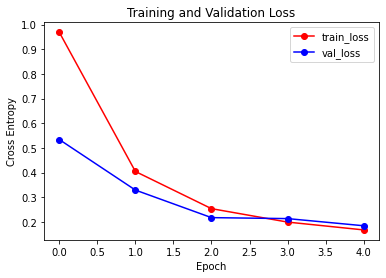

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label="train_loss")
plt.plot(val_loss, 'bo-', label="val_loss")
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.title('Training and Validation Loss')
plt.show()